This is data taken from 1978 survey conducted on housewives to in order to understand factors that lead to extramarital affairs. In this data science project, I am attempting to identify some of the factors that lead someone to pursue an affair.

In [1]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# importing the dataset

affairs_data = sm.datasets.fair.load_pandas().data
affairs_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Create a categorical variable

In [3]:
affairs_data['affair_binary'] = (affairs_data['affairs']>0)

Create a binary target feature, where value > 0 indicates an extramarital affair. This will now be our primary response target 

In [4]:
# describe the data
affairs_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


from describe function, we can obtain some statistical information such as average age(29 yrs), average years married(9 yrs) and so on.

In [5]:
affairs_data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair_binary      0
dtype: int64

No null values, no preprocessing needed. We are good to go!

In [6]:
# correlation matrix
affairs_data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair_binary,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


Some of the correlations which can be observed are: age and yrs_married, age and children, yrs_married and children

<AxesSubplot:>

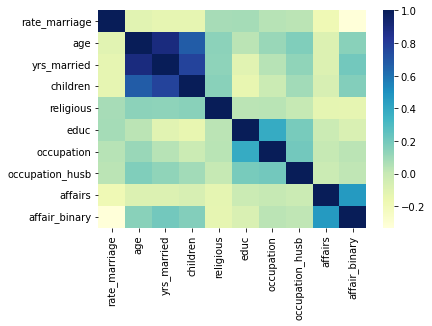

In [7]:
sns.heatmap(affairs_data.corr(), cmap="YlGnBu")

Let's make ourselves an X and a y DataFrame, where affairs_X contains all the features excluding the target and affairs_y contains the target feature. We will fit the decision tree classifier model to our X and Y, where in we can use the classifier's **feature importances method** to understand more about factors.

In [8]:
affairs_X = affairs_data.drop(['affairs','affair_binary'], axis = 1) # axis 1 to remove columnwise
affairs_y = affairs_data['affair_binary']

instantiating decision tree classifier model and cross-validating 

In [9]:
model = DecisionTreeClassifier()

scores = cross_val_score(model, affairs_X, affairs_y, cv=10)

print("average accuracy :", scores.mean())

print("standard deviation :",  scores.std())


average accuracy : 0.6553540574430063
standard deviation : 0.01788487864728279


standard deviation is low i.e variance is low. Our model is not varying significantly across each fold of the cross validation. We can assume that it is a reliable model. Lets fit the tree to our entire dataset

In [10]:
model.fit(affairs_X, affairs_y)
pd.DataFrame({'feature': affairs_X.columns, 'importance': model.feature_importances_}).sort_values('importance').tail(3)

,feature,importance
2,yrs_married,0.132897
0,rate_marriage,0.142311
7,occupation_husb,0.178769


The features occupation_husb and occupation are nominal features. Applying the dummy variable technique to transform nominal features to features that represent each nominal category quantitatively. We are doing this because Pandas, unknowingly, casts them as integers and considers them as quantitative variables.

In [11]:
occupation_dummy = pd.get_dummies(affairs_data['occupation'], prefix='Occ_').iloc[:,1:]

In [12]:
# concatenate the dummy variable onto the original dataframe
affairs_data = pd.concat([affairs_data, occupation_dummy], axis=1)

In [13]:
affairs_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,Occ__2.0,Occ__3.0,Occ__4.0,Occ__5.0,Occ__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,False,0,0,1,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,False,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,False,0,1,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,False,0,1,0,0,0


In [14]:
# lets do it for the occupation_husb feature
occupation_husb_dummy = pd.get_dummies(affairs_data['occupation_husb'], prefix="Occhusb_").iloc[:,1:]

In [15]:
# concatenate the dummy variable onto the original dataframe
affairs_data = pd.concat([affairs_data, occupation_husb_dummy], axis=1)

In [16]:
affairs_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,Occ__2.0,Occ__3.0,Occ__4.0,Occ__5.0,Occ__6.0,Occhusb__2.0,Occhusb__3.0,Occhusb__4.0,Occhusb__5.0,Occhusb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,False,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,False,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,False,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,False,0,1,0,0,0,0,0,1,0,0


Dropping occupation and occupation_husb columns as we have transformed them through dummy variables and no longer need them.

In [17]:
affairs_X = affairs_data.drop(['affairs','affair_binary','occupation','occupation_husb'], axis = 1) # axis 1 to remove columnwise
affairs_y = affairs_data['affair_binary']
affairs_X

,rate_marriage,age,yrs_married,children,religious,educ,Occ__2.0,Occ__3.0,Occ__4.0,Occ__5.0,Occ__6.0,Occhusb__2.0,Occhusb__3.0,Occhusb__4.0,Occhusb__5.0,Occhusb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,1,0,0,0,0,0,1,0,0


Running the decision tree model 

In [18]:
model1 = DecisionTreeClassifier()

scores1 = cross_val_score(model1, affairs_X, affairs_y, cv=10)

print("average accuracy :", scores1.mean())

print("standard deviation :",  scores1.std()) 

average accuracy : 0.6514276828293001
standard deviation : 0.022173284151149275


low variance across 10 fold cross validation, we can assume that the model is reliable.

In [19]:
model1.fit(affairs_X, affairs_y)
pd.DataFrame({'feature': affairs_X.columns, 'importance': model1.feature_importances_}).sort_values('importance').tail(3)

,feature,importance
3,children,0.132861
2,yrs_married,0.133832
0,rate_marriage,0.140616


According to the Decision Tree classifier, the important factors that lead to extramarital affairs **rate_marrage**(how they rate their marrage), **children** and **edu**(education)